In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pennylane as qml
import pyscf
from pyscf import gto, ao2mo, scf

### Molecula de hidrogeno

In [2]:
def H(x,y):
    charge = 0
    multiplicity = 1
    basis_set = "sto-3g"

    # Generate the molecular Hamiltonian
    hamiltonian = qml.qchem.molecular_hamiltonian(
        symbols = ["H", "H"],
        coordinates = np.array([0,0,x, 0,0,y]),
        basis=basis_set,
        charge=charge,
        mult=multiplicity
    )[0]

    # Obtain the matrix representation of the Hamiltonian
    ee = qml.eigvals(hamiltonian)
    return ee

exact = []
for i in [0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1]:
    aux = H(i,-i)
    exact.append(aux)

/Users/jnorambu/Documents/vqesimulation/env/lib/python3.9/site-packages/pennylane/ops/functions/eigvals.py:108: UserWarning: For Hamiltonians, the eigenvalues will be computed numerically. This may be computationally intensive for a large number of wires. Consider using a sparse representation of the Hamiltonian with qml.SparseHamiltonian.
  warnings.warn(


In [12]:
charge = 0
multiplicity = 1
basis_set = "6-31g"
symbols = ["H", "H"]
coordinates = np.array([0.0, 0.0, -0.6614, 0.0, 0.0, 0.6614])

hamiltonian = qml.qchem.molecular_hamiltonian(
        symbols = symbols,
        coordinates = coordinates,
        basis=basis_set,
        charge=charge,
        mult=multiplicity
    )[0]

# Obtain the matrix representation of the Hamiltonian
ee = qml.eigvals(hamiltonian)

/Users/jnorambu/Documents/vqesimulation/env/lib/python3.9/site-packages/pennylane/ops/functions/eigvals.py:108: UserWarning: For Hamiltonians, the eigenvalues will be computed numerically. This may be computationally intensive for a large number of wires. Consider using a sparse representation of the Hamiltonian with qml.SparseHamiltonian.
  warnings.warn(


In [13]:
ee

array([-1.15015652, -0.90214058, -0.90214058, -0.73210246, -0.73210246,
       -0.73210246, -0.57496493, -0.54501365, -0.54501365, -0.4573917 ,
       -0.4573917 , -0.40656487, -0.40656487, -0.30155458, -0.30155458,
       -0.30155458, -0.29116099, -0.14216493, -0.14216493, -0.14216493,
       -0.14216493, -0.10837638, -0.02759726, -0.02759726,  0.0144269 ,
        0.11888473,  0.11888473,  0.16377376,  0.16377376,  0.16377376,
        0.16409712,  0.16409712,  0.22755196,  0.27390298,  0.27390298,
        0.27390298,  0.29873517,  0.29873517,  0.31199174,  0.3470265 ,
        0.3470265 ,  0.3470265 ,  0.4552315 ,  0.4552315 ,  0.4552315 ,
        0.4552315 ,  0.48030427,  0.48030427,  0.48803866,  0.48803866,
        0.48803866,  0.52317769,  0.52317769,  0.5777653 ,  0.5777653 ,
        0.64804208,  0.66256352,  0.66256352,  0.69633705,  0.75597218,
        0.79397114,  0.81107038,  0.81844135,  0.81844135,  0.83791976,
        0.83791976,  0.83791976,  0.86820405,  0.86820405,  0.86

In [3]:
exact

[-0.4107884682468595,
 -0.6765108086758709,
 -0.8463259830587385,
 -0.9575985310280861,
 -1.0310430257461412,
 -1.0789697687356876,
 -1.1091372904239425,
 -1.126698821585863,
 -1.1352279322918863,
 -1.1372759438392808,
 -1.1346906591348456,
 -1.1288156440826158,
 -1.1206287953511382,
 -1.1108459779330047,
 -1.0999996214734906,
 -1.0884963088623885]

In [93]:
dataframe = pd.read_csv("DatosH2scipy.csv", ";")
labels = ['Nelder-Mead', 'Powell', 'CG', 'BFGS', 'L-BFGS-B', 'TNC', 'COBYLA', 'SLSQP']
bohr_angs = 0.529177210903


/var/folders/gp/9l_7srgd2dx2mppp47fkwsd40000gn/T/ipykernel_23960/2984069632.py:1: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  dataframe = pd.read_csv("DatosH2scipy.csv", ";")


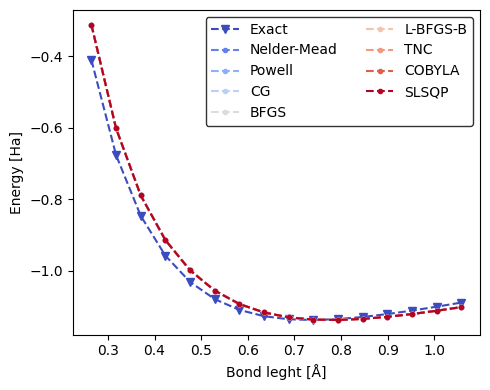

In [94]:
x =  dataframe.values.T
cycle = plt.cm.coolwarm(np.linspace(0, 1, 9))

fig, ax = plt.subplots(1, 1, figsize=(5,4),)
ax.set_prop_cycle('color', cycle)
ax.plot(x[0]*bohr_angs,  exact, "v", label="Exact", ls="dashed")
for i in range(1,len(x)-1):
    ax.plot(x[0]*bohr_angs, [float(j) for j in x[i]], ".", label=labels[i-1], ls="dashed")
ax.legend(loc="upper right", fontsize='medium',frameon=True, edgecolor='k',ncol=2)
ax.set_xlabel('Bond leght [Å]', fontsize=10)
ax.set_ylabel('Energy [Ha]', fontsize=10)
fig.tight_layout()
plt.show()

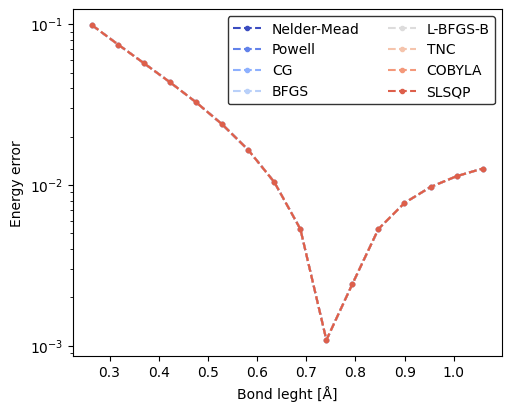

In [95]:
x =  dataframe.values.T
cycle = plt.cm.coolwarm(np.linspace(0, 1, 9))

fig, ax = plt.subplots(1, 1, figsize=(5,4),)
ax.set_prop_cycle('color', cycle)
for i in range(1,len(x)-1):
    ax.plot(x[0]*bohr_angs, [np.abs(float(j)- exact[k]) for k,j in enumerate(x[i])], ".", label=labels[i-1], ls="dashed")
fig.tight_layout()
ax.legend(loc="upper right", fontsize='medium',frameon=True, edgecolor='k',ncol=2)
ax.set_xlabel('Bond leght [Å]', fontsize=10)
ax.set_ylabel('Energy error', fontsize=10)
plt.yscale('log')
plt.show()

In [104]:
dataframe = pd.read_csv("DatosH2grad.csv", ";")
labels = ['0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8', '0.9', '1.0'] 
bohr_angs = 0.529177210903

/var/folders/gp/9l_7srgd2dx2mppp47fkwsd40000gn/T/ipykernel_23960/1912767527.py:1: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  dataframe = pd.read_csv("DatosH2grad.csv", ";")


[0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2. ]


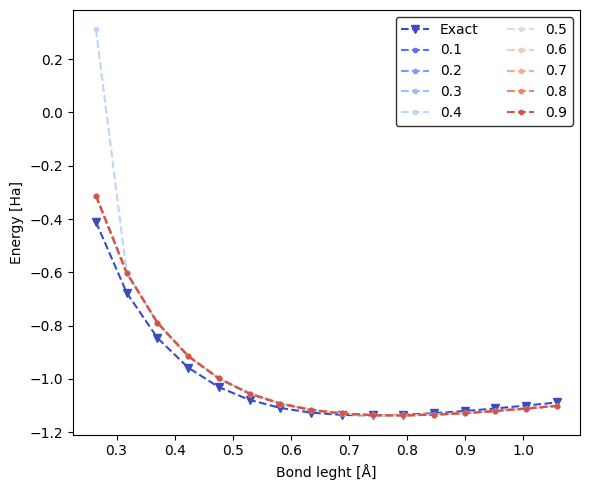

In [111]:
x =  dataframe.values.T
x_axis = 2*np.array([0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1])
cycle = plt.cm.coolwarm(np.linspace(0, 1, 11))

fig, ax = plt.subplots(1, 1, figsize=(6,5),)
ax.set_prop_cycle('color', cycle)
print(x[0])
ax.plot(x[0]*bohr_angs,  exact, "v", label="Exact", ls="dashed")
for i in range(1,len(x)-1):
    ax.plot(x_axis*bohr_angs, [float(j) for j in x[i]], ".", label=labels[i-1], ls="dashed")
ax.legend(loc="upper right", fontsize='medium',frameon=True, edgecolor='k',ncol=2)
ax.set_xlabel('Bond leght [Å]', fontsize=10)
ax.set_ylabel('Energy [Ha]', fontsize=10)
fig.tight_layout()
plt.show()

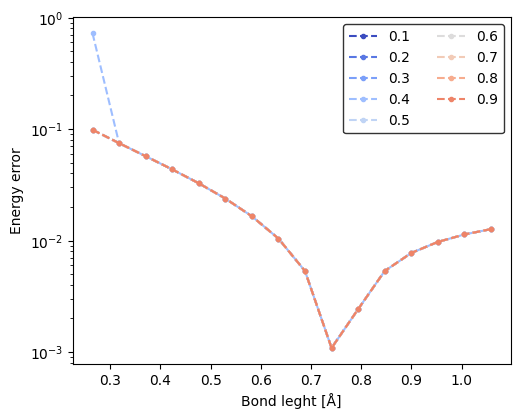

In [110]:
fig, ax = plt.subplots(1, 1, figsize=(5,4),)
ax.set_prop_cycle('color', cycle)
for i in range(1,len(x)-1):
    ax.plot(x_axis*bohr_angs, [np.abs(float(j)- exact[k]) for k,j in enumerate(x[i])], ".", label=labels[i-1], ls="dashed")
fig.tight_layout()
ax.legend(loc="upper right", fontsize='medium',frameon=True, edgecolor='k',ncol=2)
ax.set_xlabel('Bond leght [Å]', fontsize=10)
ax.set_ylabel('Energy error', fontsize=10)
plt.yscale('log')
plt.show()